In [15]:
from dataloader.get import DataGetter
from preprocessing.utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_predict,train_test_split, cross_val_score
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import timeit
import os


In [16]:
preprocess=makePreprocess()
df=DataGetter()
df=df.getData('train')
df

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price,images
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0,"LazyImages(len=4, isLoaded=False)"
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,"LazyImages(len=6, isLoaded=False)"
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0,"LazyImages(len=4, isLoaded=False)"
35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,...,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0,"LazyImages(len=6, isLoaded=False)"
35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0,"LazyImages(len=5, isLoaded=False)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,E,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,"LazyImages(len=6, isLoaded=False)"
35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,D,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399000.0,"LazyImages(len=6, isLoaded=False)"
36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,NaN,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,328000.0,"LazyImages(len=5, isLoaded=False)"


In [17]:
df=preprocess.applyPreprocessing(df)
df

,scorePropertyType,scoreCity,scoreSize,scoreLandsize,scoreFloor,scoreRoom,nb_parking_places,nb_boxes,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price
id_annonce,,,,,,,,,,,,,,,,
35996577,0.543463,5275.736122,63.0,0.0,0.000000,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0
35811033,0.543463,5268.414609,90.0,0.0,1.386294,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0
35731841,0.492737,4489.0,61.0,370.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0
35886765,0.492737,4439.0,142.0,764.0,0.000000,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0
35781137,0.543463,5987,88.0,0.0,1.386294,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,0.543463,2013.0,2995.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0
35890109,0.543463,10570,36.0,0.0,1.609438,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399000.0
36010245,0.543463,3822.0,99.0,0.0,1.098612,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,328000.0


In [18]:
df_5_columns = df.iloc[:, :5]

# Initialisation de StandardScaler
scaler = StandardScaler()

# Transformation des 5 premières colonnes avec StandardScaler
df_5_columns_scaled = scaler.fit_transform(df_5_columns)

# Mise à jour du jeu de données original avec les 5 premières colonnes normalisées
df.iloc[:, :5] = df_5_columns_scaled



# Télécharger les données
X = df.drop("price", axis=1)
y = df["price"]
X_val, X=X[:3000],X[3000:]
y_val, y=y[:3000],y[3000:]



# diviser les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Define the parameter grids for each regressor
mlp_param_grid = {
    "hidden_layer_sizes": [(50,50,50), (50,100,50), (100,)],
    "activation": ["tanh", "relu"],
    "alpha": [0.0001, 0.05],
    "max_iter": [100, 250, 500],
    "learning_rate": ["constant", "adaptive"],
}

dt_param_grid = {
    "criterion": ["mse", "friedman_mse"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

sgd_param_grid = {"loss": ["squared_loss", "huber", "epsilon_insensitive"],
    "penalty": ["l2", "l1", "elasticnet"],
    "alpha": [0.0001, 0.001, 0.01],
    "l1_ratio": [0, 0.15, 0.5, 0.7],
    "fit_intercept": [True, False],
    "max_iter": [1000, 5000, 7500],
    "max_iter": [100, 250, 500],
    "learning_rate": ["constant", "optimal", "invscaling"]}



lasso_param_grid =     {'alpha': np.logspace(-4, 4, 9),
              'fit_intercept': [True, False],
              'normalize': [True, False],
              'precompute': [True, False],
              'selection': ['cyclic', 'random']}



In [19]:

#Define the regressors to use
mlp = MLPRegressor()
dt = DecisionTreeRegressor()
sgd = SGDRegressor()
lasso= Lasso()

#Define the list of regressors and their parameter grids
regressors = [(mlp, mlp_param_grid),(dt, dt_param_grid),(sgd, sgd_param_grid),(lasso, lasso_param_grid),]



In [20]:
n_cpu=os.cpu_count()
n_cpu

16

In [21]:
#Use GridSearchCV to find the best hyperparameters for each regressor
grid_searches = []

for regressor, param_grid in regressors:
    grid_search = GridSearchCV(regressor, param_grid, cv=4, n_jobs=n_cpu-1)
    grid_search.fit(X, y)
    grid_searches.append(grid_search)
    print("Best parameters for {}: {}".format(regressor.__class__.__name__, grid_search.best_params_))
    print("Score:", grid_search.best_score_)



C:\Users\chouk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLPRegressor: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 500}
Score: 0.41706936602683364
Best parameters for DecisionTreeRegressor: {'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Score: 0.5563264687554572


C:\Users\chouk\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Best parameters for SGDRegressor: {'alpha': 0.0001, 'fit_intercept': True, 'l1_ratio': 0, 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'max_iter': 500, 'penalty': 'l1'}
Score: -0.4844134099656623
Best parameters for Lasso: {'alpha': 10000.0, 'fit_intercept': True, 'normalize': False, 'precompute': False, 'selection': 'random'}
Score: 0.3026141331981154


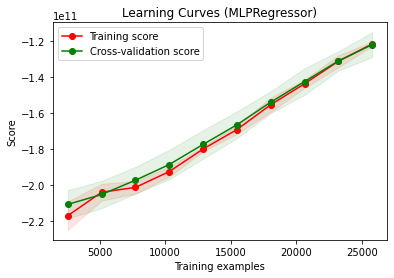

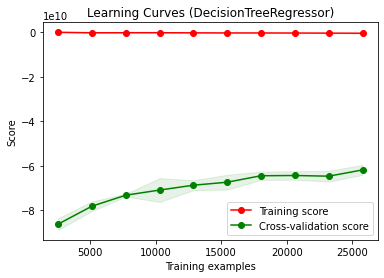

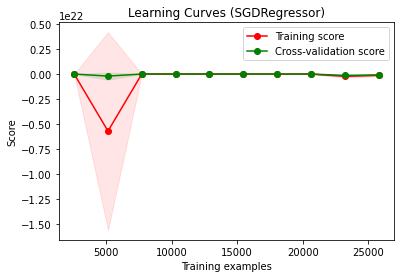

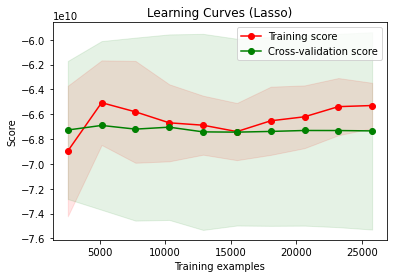

In [22]:


regressors = [mlp, dt, sgd, lasso]
regressor_names = ["MLP", "Decision Tree", "SGD", "Lasso"]

# Plot the learning curves for each regressor
for regressor, regressor_name in zip(regressors, regressor_names):
    train_sizes, train_scores, test_scores = learning_curve(regressor, X,y,
                                                             train_sizes=np.linspace(0.1, 1.0, 10),
                                                             cv=4,
                                                             scoring='neg_mean_squared_error', n_jobs=n_cpu-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    # Plot the learning curve
    plt.figure()
    plt.title("Learning Curves ({})".format(regressor.__class__.__name__))
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

    

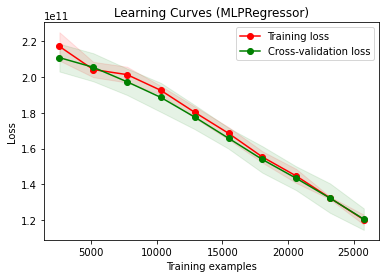

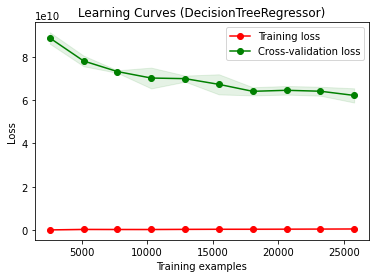

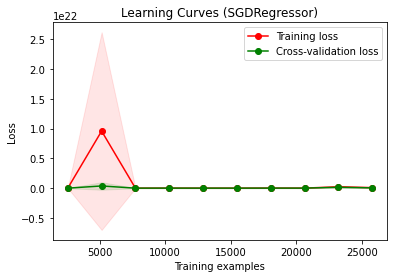

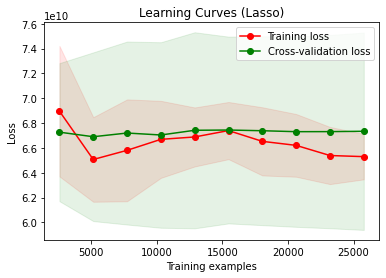

In [29]:
regressors = [mlp, dt, sgd, lasso]
regressor_names = ["MLP", "Decision Tree", "SGD", "Lasso"]

# Plot the learning curves for each regressor
for regressor, regressor_name in zip(regressors, regressor_names):
    train_sizes, train_scores, test_scores = learning_curve(regressor, X,y,
                                                             train_sizes=np.linspace(0.1, 1.0, 10),
                                                             cv=4,
                                                             scoring='neg_mean_squared_error', n_jobs=n_cpu-1)

    train_losses = -train_scores
    train_losses_mean = np.mean(train_losses, axis=1)
    train_losses_std = np.std(train_losses, axis=1)
    test_losses = -test_scores
    test_losses_mean = np.mean(test_losses, axis=1)
    test_losses_std = np.std(test_losses, axis=1)


    # Plot the learning curve
    plt.figure()
    plt.title("Learning Curves ({})".format(regressor.__class__.__name__))
    plt.xlabel("Training examples")
    plt.ylabel("Loss")

    plt.fill_between(train_sizes, train_losses_mean - train_losses_std, train_losses_mean + train_losses_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_losses_mean - test_losses_std, test_losses_mean + test_losses_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_losses_mean, 'o-', color="r", label="Training loss")
    plt.plot(train_sizes, test_losses_mean, 'o-', color="g", label="Cross-validation loss")

    plt.legend(loc="best")
    plt.show()


In [23]:
regressors = [(mlp, mlp_param_grid),(dt, dt_param_grid),(sgd, sgd_param_grid),(lasso, lasso_param_grid),]
for i, (regressor, param_grid) in enumerate(regressors):
    best_regressor = grid_searches[i].best_estimator_
    scores = cross_val_score(best_regressor, X, y, cv=4,n_jobs=n_cpu-1)
    print("Cross-validation scores for {}: {}".format(regressor.__class__.__name__, scores))
    print("Mean score: {}".format(scores.mean()))

Cross-validation scores for MLPRegressor: [0.38693111 0.32872007 0.43351583 0.38055459]
Mean score: 0.38243039827870445
Cross-validation scores for DecisionTreeRegressor: [0.57301376 0.56389042 0.53270696 0.55496799]
Mean score: 0.5561447821522176
Cross-validation scores for SGDRegressor: [-0.47014189 -0.48069286 -0.5015869  -0.48523628]
Mean score: -0.4844144823514283
Cross-validation scores for Lasso: [0.32320453 0.26805136 0.30450479 0.31468826]
Mean score: 0.3026122362306396


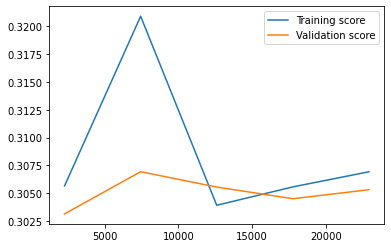

In [24]:
#Plot the learning curve to see how the model's performance improves with more data
train_sizes, train_scores, validation_scores = learning_curve(best_regressor, X,y, cv=3)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, validation_scores.mean(axis=1), label="Validation score")
plt.legend(loc="best")
plt.show()


In [25]:
#Use the best regressor to make predictions on the entire dataset
best_index = np.argmax([grid_search.best_score_ for grid_search in grid_searches])
best_regressor = grid_searches[best_index].best_estimator_
best_regressor.fit(X, y)
y_pred = best_regressor.predict(X)

In [26]:
np.sum(y_pred==y)

0

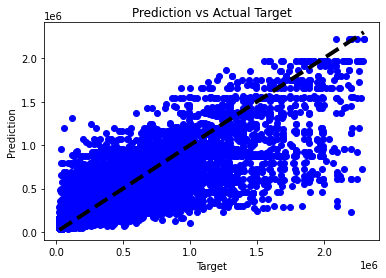

In [27]:
#Plot the prediction versus the actual target
plt.figure()
plt.title("Prediction vs Actual Target")
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.scatter(y, y_pred, color="b")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=4)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error: {}".format(mse))
print("R-Squared: {}".format(r2))

Mean Squared Error: 32888370361.162163
R-Squared: 0.6552753160480362
